In [1]:
from dqnotebook import QuadraticDrawer

In [2]:
%matplotlib notebook

In [3]:
from cmath import rect, pi, sqrt

In [4]:
from obj import QuadraticDifferential
import matplotlib as mpl
#mpl.use("pgf")
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


In [5]:
def hacer_reticula(quad, punto, paso, longitud):
    t1 = quad.compute_trajectory(punto)
    quad.phase = quad.phase*complex(-1,0)
    t2 = quad.compute_trajectory(punto)
    coord1=t1.coordinates.tolist()
    coord2=t2.coordinates.tolist()
    plots = []
    plots_ort = []
    recorrido = 0
    num_paso = 1
    start1 = coord1.index([t1.plotpoint.real, t1.plotpoint.imag])
    start2 = coord2.index([t2.plotpoint.real, t2.plotpoint.imag])
    while recorrido < longitud:
        paso_inicio = complex(coord1[start1][0],coord1[start1][1])
        paso_fin = complex(coord1[start1+1][0],coord1[start1+1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start1 += 1
        if recorrido >= num_paso*paso:
            plots_ort.append(paso_fin)
            num_paso += 1
    recorrido = 0
    num_paso = 1
    while recorrido < longitud:
        paso_inicio = complex(coord2[start2][0],coord2[start2][1])
        paso_fin = complex(coord2[start2+1][0],coord2[start2+1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start2 += 1
        if recorrido >= num_paso*paso:
            plots.append(paso_fin)
            num_paso += 1
    start1 = coord1.index([t1.plotpoint.real, t1.plotpoint.imag])
    start2 = coord2.index([t2.plotpoint.real, t2.plotpoint.imag])
    recorrido = 0
    num_paso = 1
    while recorrido < longitud:
        paso_inicio = complex(coord1[start1][0],coord1[start1][1])
        paso_fin = complex(coord1[start1-1][0],coord1[start1-1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start1 -= 1
        if recorrido >= num_paso*paso:
            plots_ort.append(paso_fin)
            num_paso += 1
    recorrido = 0
    num_paso = 1
    while recorrido < longitud:
        paso_inicio = complex(coord2[start2][0],coord2[start2][1])
        paso_fin = complex(coord2[start2-1][0],coord2[start2-1][1])
        recorrido += abs(paso_fin-paso_inicio)*abs(sqrt(quad.QD((paso_inicio+paso_fin)/2)))
        start2 -= 1
        if recorrido >= num_paso*paso:
            plots.append(paso_fin)
            num_paso += 1
    quad.plotpoints = quad.plotpoints + plots + plots_ort
        

<IPython.core.display.Javascript object>


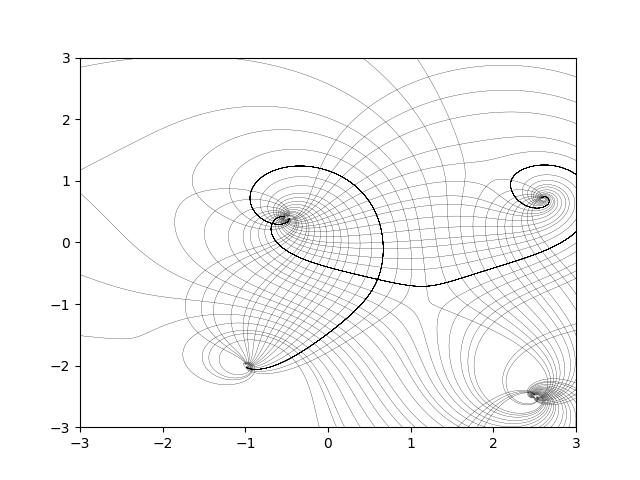

..........................................................
........................................................


In [6]:
fig9=plt.figure()
quad9=QuadraticDifferential()
quad_drawer9=QuadraticDrawer(quad9,fig9)
quad_drawer9_ort=QuadraticDrawer(quad9,fig9)
quad9.zeros=[complex(1.2,-1),complex(2,1.1),complex(-2,0.9), complex(-2.3,-1.7) ]
quad9.dblpoles = [complex(2.5,-2.5), complex(2.6, 0.7), complex(-0.5, 0.4), complex(-1,-2)]
quad9.plotpoints = []
quad9.trajectories = {}
hacer_reticula(quad9, complex(.6,-.6), 0.03, 0.42)
quad9.phase=complex(1,0)
quad_drawer9.draw_trajectories()
quad9.phase=complex(-1,0)
quad_drawer9_ort.draw_trajectories()

In [ ]:
hacer_reticula(quad9, complex(.6,-.6), 0.03, 0.48)
quad9.phase=complex(1,0)
quad_drawer9.draw_trajectories()
quad9.phase=complex(-1,0)
quad_drawer9_ort.draw_trajectories()

<IPython.core.display.Javascript object>


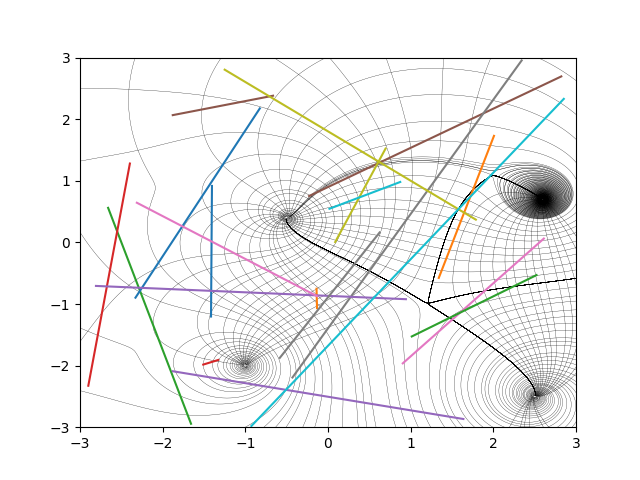

..........................................................
........................................................


In [10]:
fig9=plt.figure()
quad9=QuadraticDifferential()
quad9.phase=nueva_fase
quad_drawer9=QuadraticDrawer(quad9,fig9)
quad_drawer9_ort=QuadraticDrawer(quad9,fig9)
quad9.zeros=[complex(1.2,-1),complex(2,1.1),complex(-2,0.9), complex(-2.3,-1.7) ]
quad9.dblpoles = [complex(2.5,-2.5), complex(2.6, 0.7), complex(-0.5, 0.4), complex(-1,-2)]
quad9.plotpoints = []
quad9.trajectories = {}
hacer_reticula(quad9, complex(1.21,-.99), 0.03, 0.42)
quad9.phase=quad9.phase*complex(-1,0)
quad_drawer9.draw_trajectories()
quad9.phase=quad9.phase*complex(-1,0)
quad_drawer9_ort.draw_trajectories()

In [ ]:
limite= 5.0
quad_drawer9.ax.set_ylim(-1*limite,limite)
quad_drawer9.ax.set_xlim(-1*limite,limite)
fig9.set_size_inches(10,10)

In [7]:
from obj import Monodromy

In [8]:
def integrar(x,y,quad, pasos):
    paso = (y-x)/pasos
    medio_paso = paso/2
    mon=Monodromy(quad(x))
    integral = 0
    for i in range(pasos):
        #integral += mon.dist(quad(x+medio_paso))*paso*sqrt(abs(quad.QD(x+medio_paso)))
        integral += paso*(sqrt(abs(quad.QD(x)))*mon.dist(quad(x))   +  sqrt(abs(quad.QD(x+paso)))*mon.dist(quad(x+paso))     )/2
        x+=paso
        mon(quad(x))
    return integral

In [ ]:
quad9.phase= complex(1,0)

In [9]:
nueva_fase = integrar(complex(1.201,-1),complex(2,1.101),quad9,10000)
nueva_fase= nueva_fase/abs(nueva_fase)
nueva_fase=nueva_fase**-2

In [11]:
from numpy import arange
def error(inicio,fin,quad):
    x=arange(20,100)
    x = [500*i for i in x]
    y = [integrar(inicio,fin,quad,i) for i in x]
    x= arange(1,79)
    y2 = [abs(y[i]-y[i-1]) for i in x]
    return [x,y2]

In [ ]:
plt.figure(7)


In [12]:
from numpy import random
Parejas = []
for x, y, z, w in 6*random.random((20,4))-3.0:
    Parejas.append([complex(x,y),complex(z,w)])

In [13]:
for x, y in Parejas:
    plt.plot([x.real,y.real],[x.imag,y.imag])

<IPython.core.display.Javascript object>


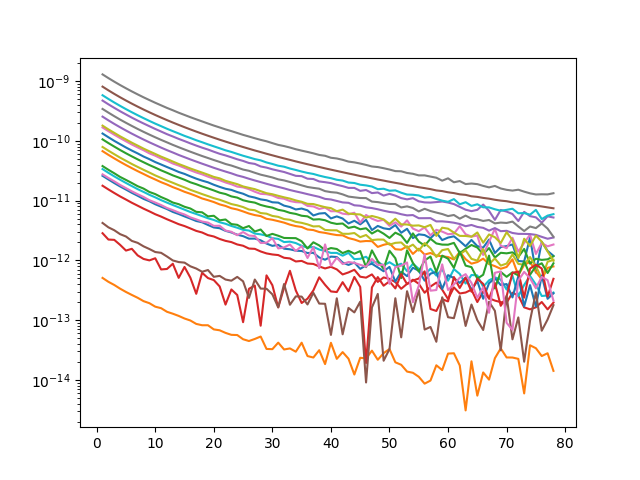

El error en los puntos (-1.41501595988-1.20334256519j) , (-1.40366437524+0.916670205016j) es 1.19295981248e-12
El error en los puntos (1.3400139164-0.576362419556j) , (2.00788406167+1.7295398077j) es 7.91839794864e-13
El error en los puntos (-1.65688190234-2.94422584924j) , (-2.65984118429+0.560905950019j) es 1.17126829353e-12
El error en los puntos (-2.89942987182-2.32705444733j) , (-2.39660159487+1.28025920255j) es 1.96586843007e-13
El error en los puntos (-1.87689899587-2.09162588471j) , (1.63763735929-2.86691930645j) es 5.21245853655e-12
El error en los puntos (-0.229089588839+0.752832033055j) , (2.82224392548+2.69456213494j) es 7.43861721786e-12
El error en los puntos (0.904464102702-1.96345033384j) , (2.6110222525+0.0623322920048j) es 1.84276216208e-12
El error en los puntos (2.34262363824+2.95364801134j) , (-0.430083961903-2.19330631736j) es 1.32994815112e-11
El error en los puntos (0.696579567208+1.52341968275j) , (0.0869966741489+0.00563703552071j) es 1.02074685261e-12
El erro

In [14]:
fig_errrrrr = plt.figure(11)
for x,y in Parejas:
    er = error(x,y,quad9)
    print "El error en los puntos "+str(x)+" , "+str(y)+" es "+str(er[1][-1])
    xes=er[0]
    yes=er[1]
    plt.plot(xes,yes)
plt.yscale('log')

In [ ]:
fig_errrrrr